### Overview

In [ ]:
import matplotlib.pyplot as plt
import scienceplots

plt.style.use(['science', 'nature', 'notebook'])

In [ ]:
from astropy.time import Time

## Main dates
date_launch = Time("2011-08-06", scale="utc").tdb
date_flyby = Time("2013-10-09 19:21", scale="utc").tdb
date_arrival = Time("2016-07-05 03:18", scale="utc").tdb

#### Trajectories in Carrington coordinate system

In [ ]:
from solarmach import SolarMACH, print_body_list

# optional: get list of available bodies/spacecraft
print(print_body_list().index)

def plot_solarmach(date):
   # necessary options
   body_list = ['Juno', 'Earth', 'STEREO-A']
   vsw_list = [400, 400, 400, 400, 400, 400, 400] # position-sensitive solar wind speed per body in body_list

   # optional parameters
   coord_sys = 'Carrington'                         # 'Carrington' (default) or 'Stonyhurst'
   reference_long = None                             # longitude of reference (None to omit)
   reference_lat = None                                # latitude of reference (None to omit)
   plot_spirals = True                              # plot Parker spirals for each body
   plot_sun_body_line = True                        # plot straight line between Sun and body
   long_offset = 270                                # longitudinal offset for polar plot; defines where Earth's longitude is (by default 270, i.e., at "6 o'clock")
   reference_vsw = 400                              # define solar wind speed at reference
   return_plot_object = False                        # figure and axis object of matplotib are returned, allowing further adjustments to the figure
   transparent = False                              # make output figure background transparent
   numbered_markers = True                          # plot each body with a numbered marker
   filename = '../figures/solarmach/Solar-MACH_'+date.replace(' ', '_')  # define filename of output figure

   # initialize
   sm = SolarMACH(date, body_list, vsw_list, reference_long, reference_lat, coord_sys)

   # make plot
   sm.plot(
      plot_spirals=plot_spirals,
      plot_sun_body_line=plot_sun_body_line,
      reference_vsw=reference_vsw,
      transparent=transparent,
      numbered_markers=numbered_markers,
      long_offset=long_offset,
      return_plot_object=return_plot_object,
      outfile=filename+'.png',
      hide_logo=True
   )

   # obtain data as Pandas DataFrame
   # display(sm.coord_table)
   return sm.coord_table

Index(['Earth', 'ACE', 'BepiColombo', 'Cassini', 'JUICE', 'Juno', 'Jupiter',
       'L1', 'Mars', 'Mars Express', 'MAVEN', 'Mercury', 'MESSENGER', 'PSP',
       'Pioneer10', 'Pioneer11', 'Rosetta', 'SOHO', 'Solar Orbiter',
       'STEREO B', 'STEREO A', 'Ulysses', 'Venus', 'Voyager1', 'Voyager2',
       'WIND'],
      dtype='object', name='Key')


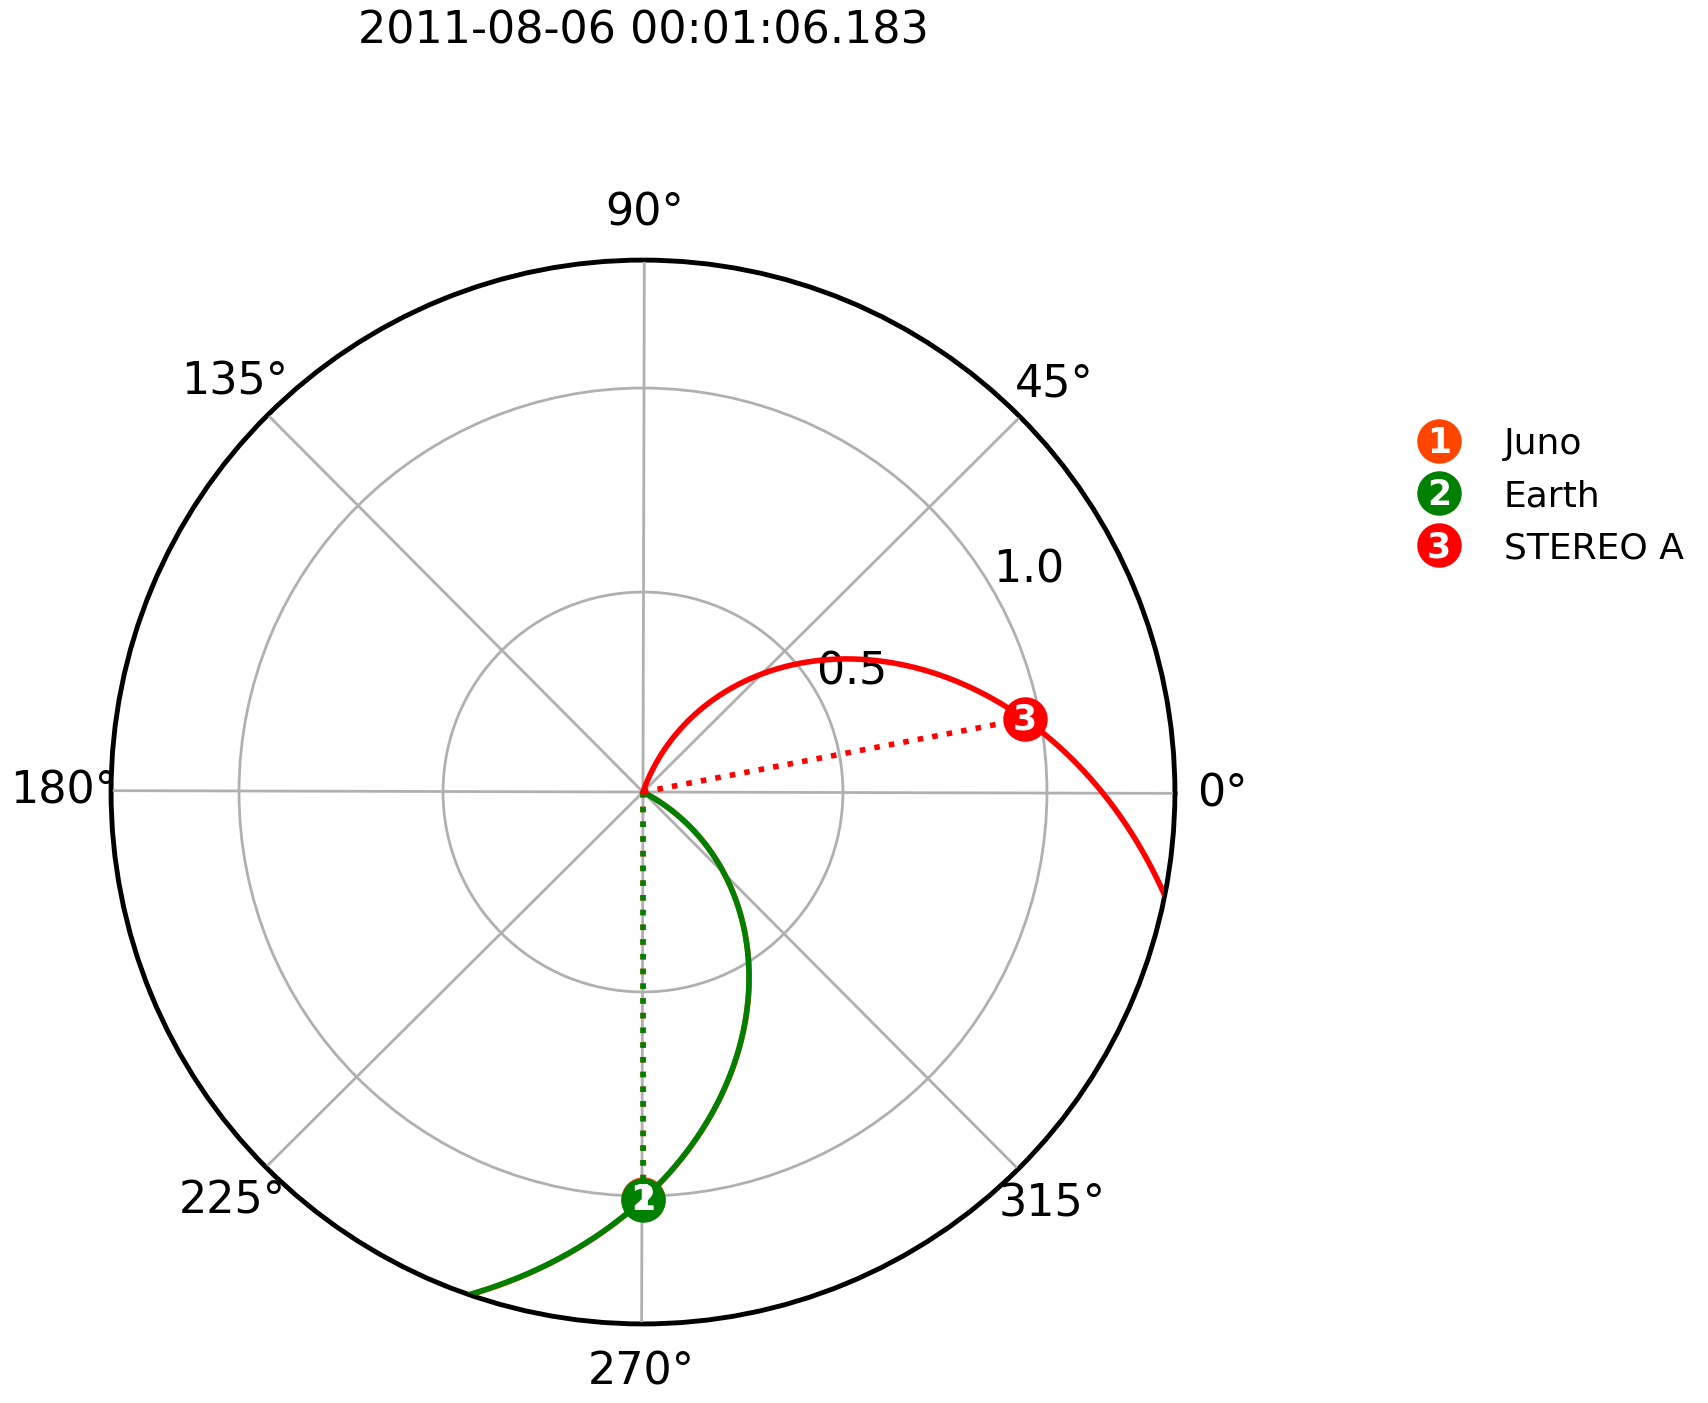

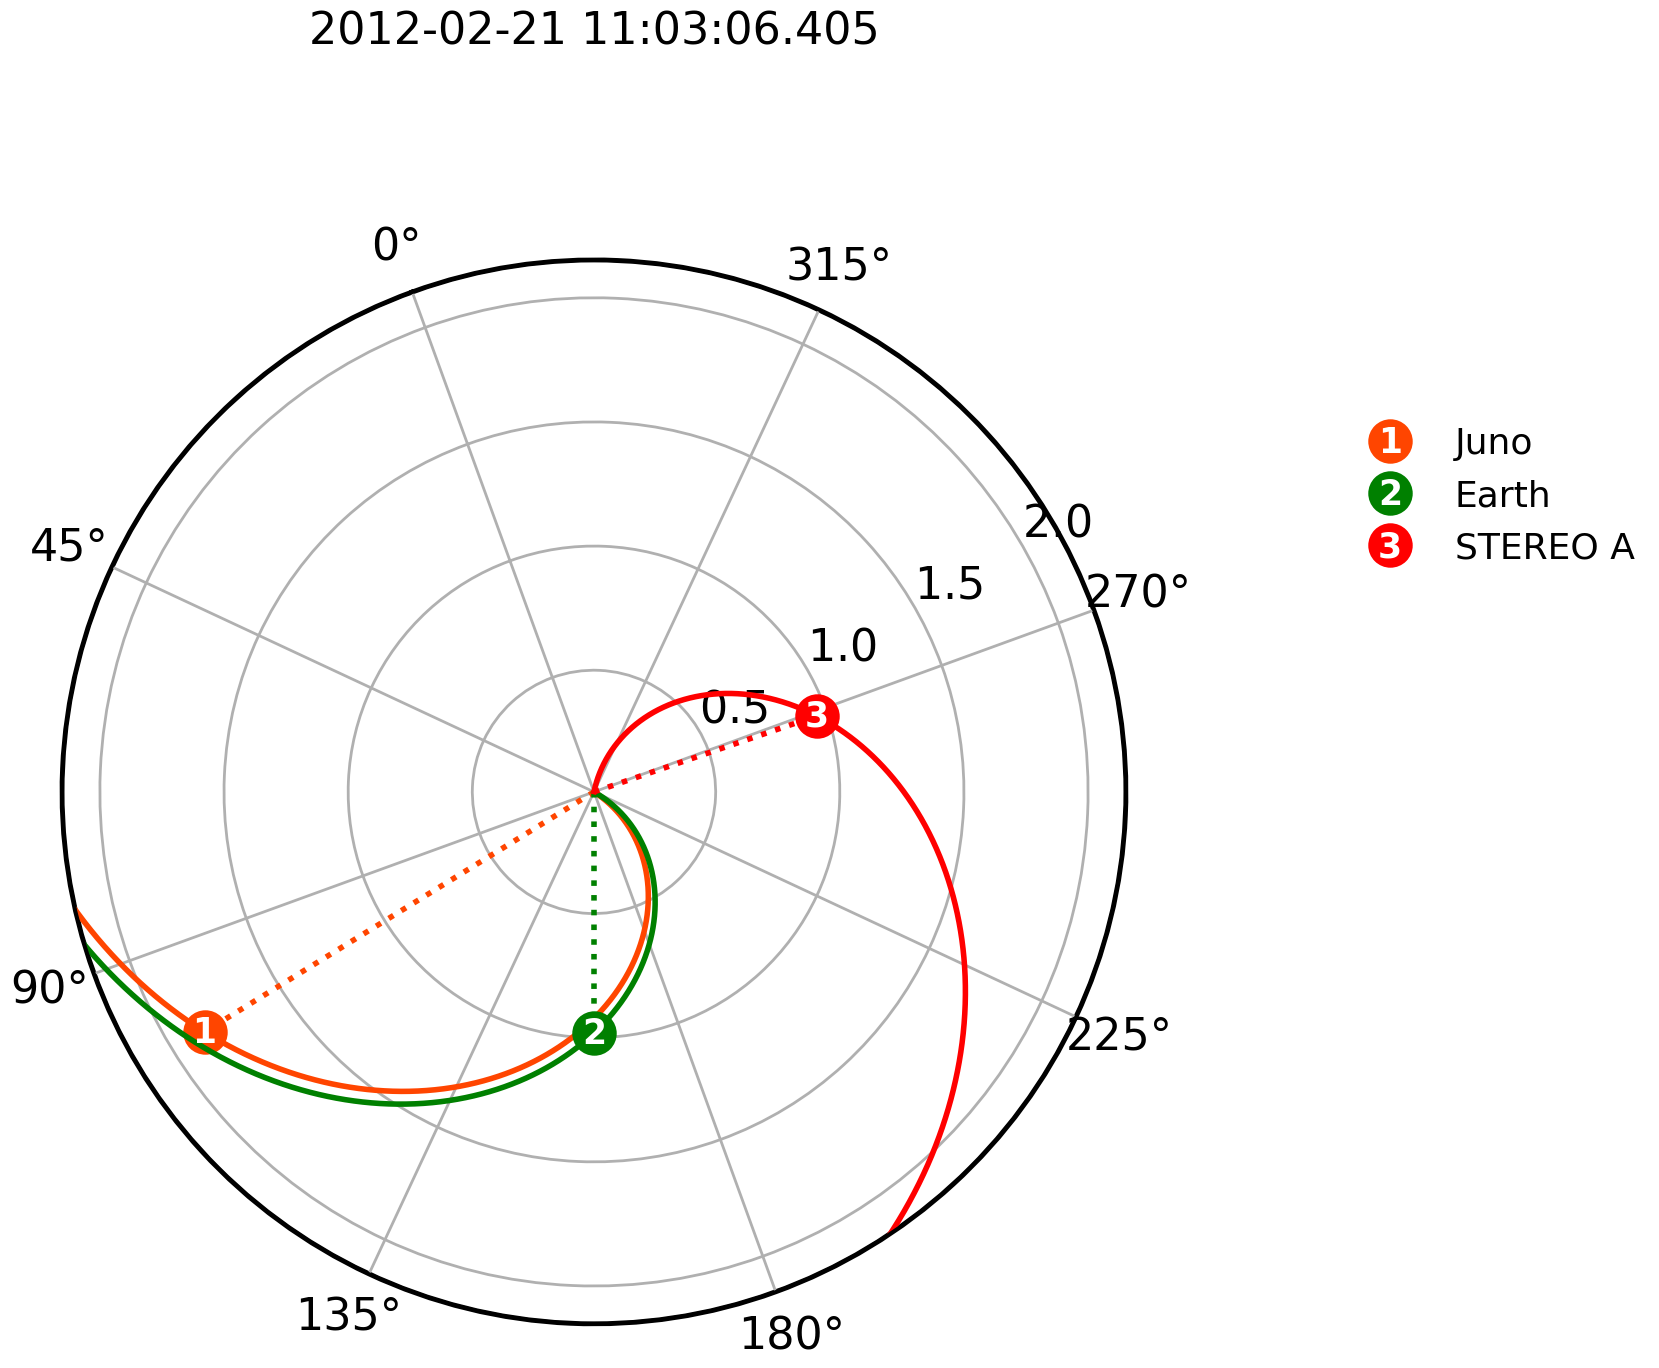

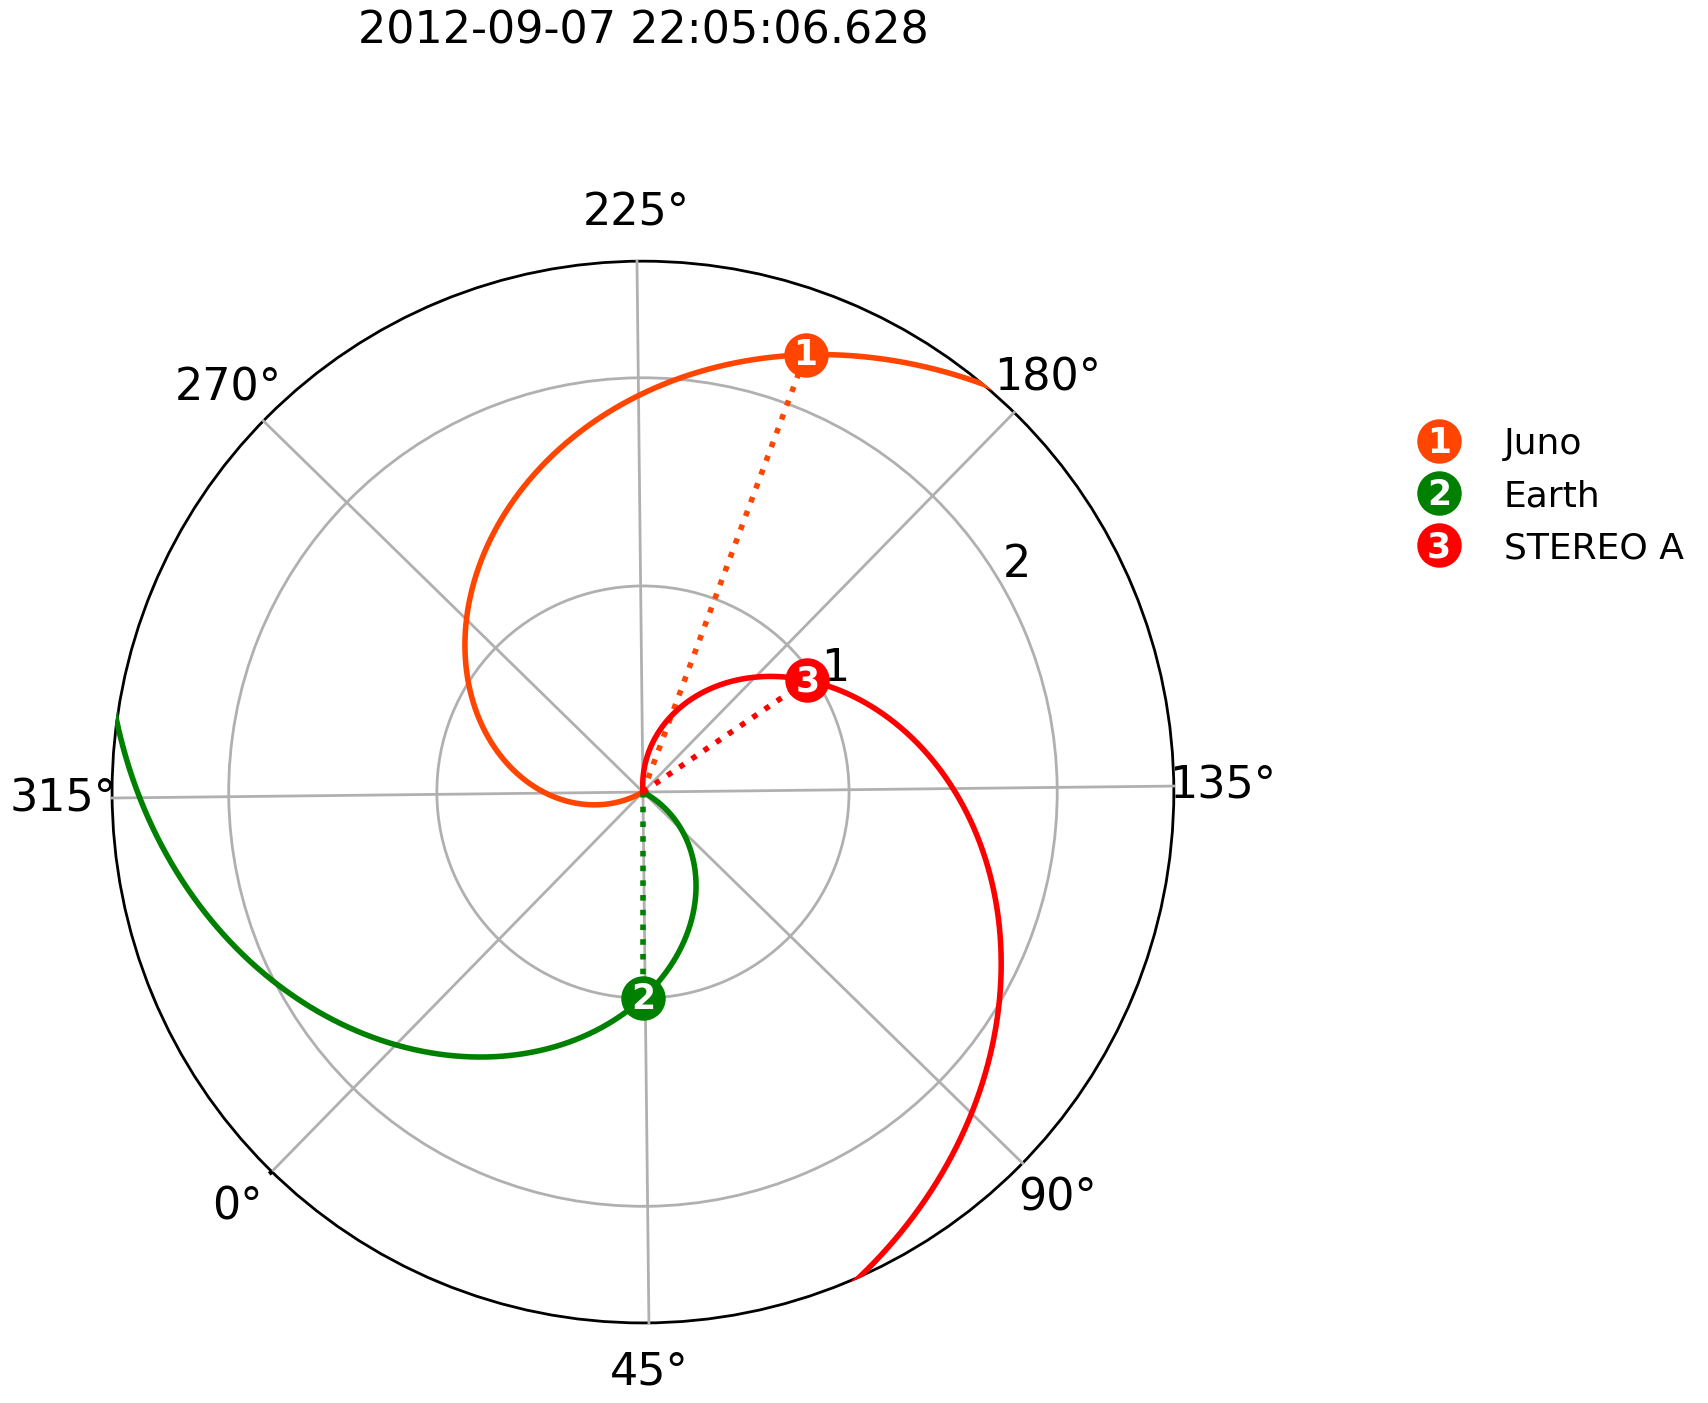

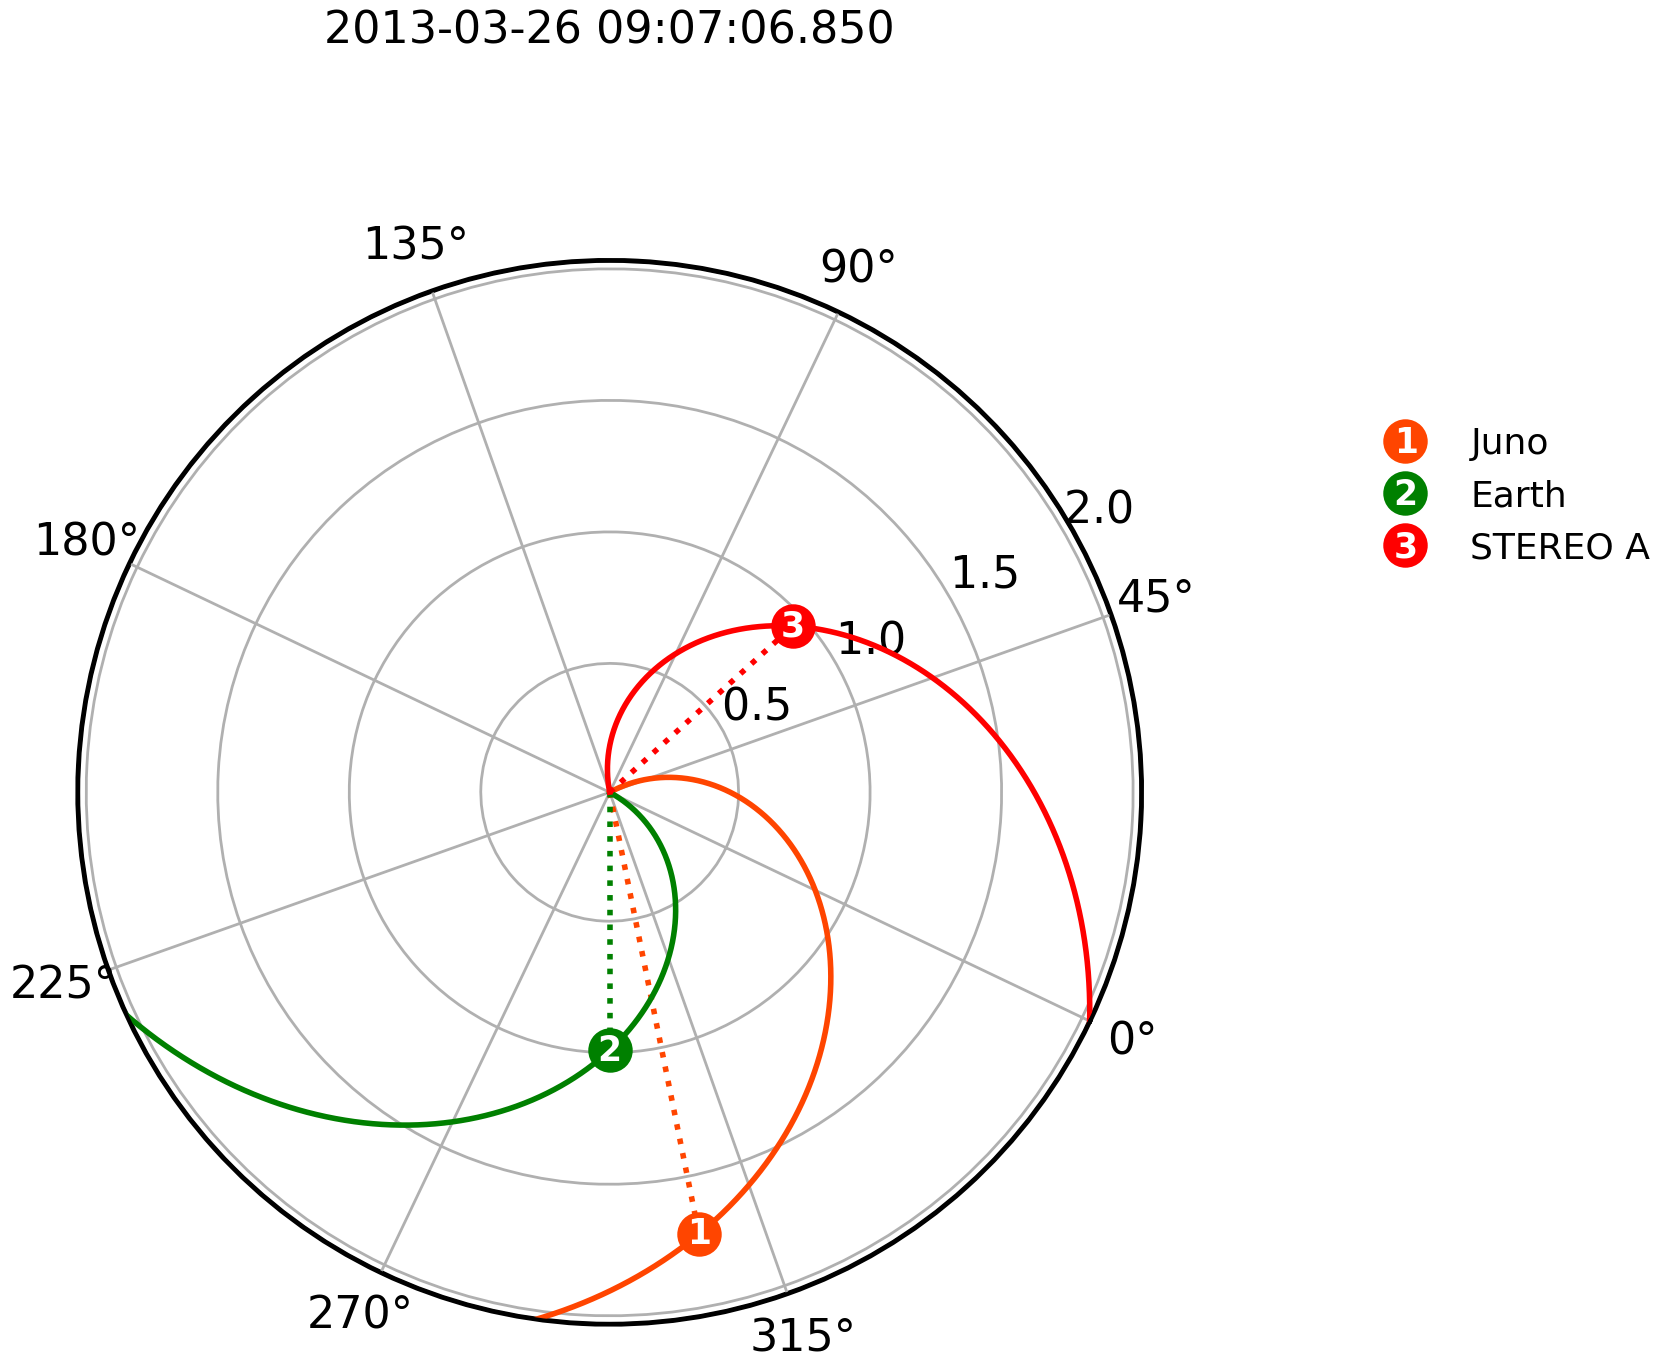

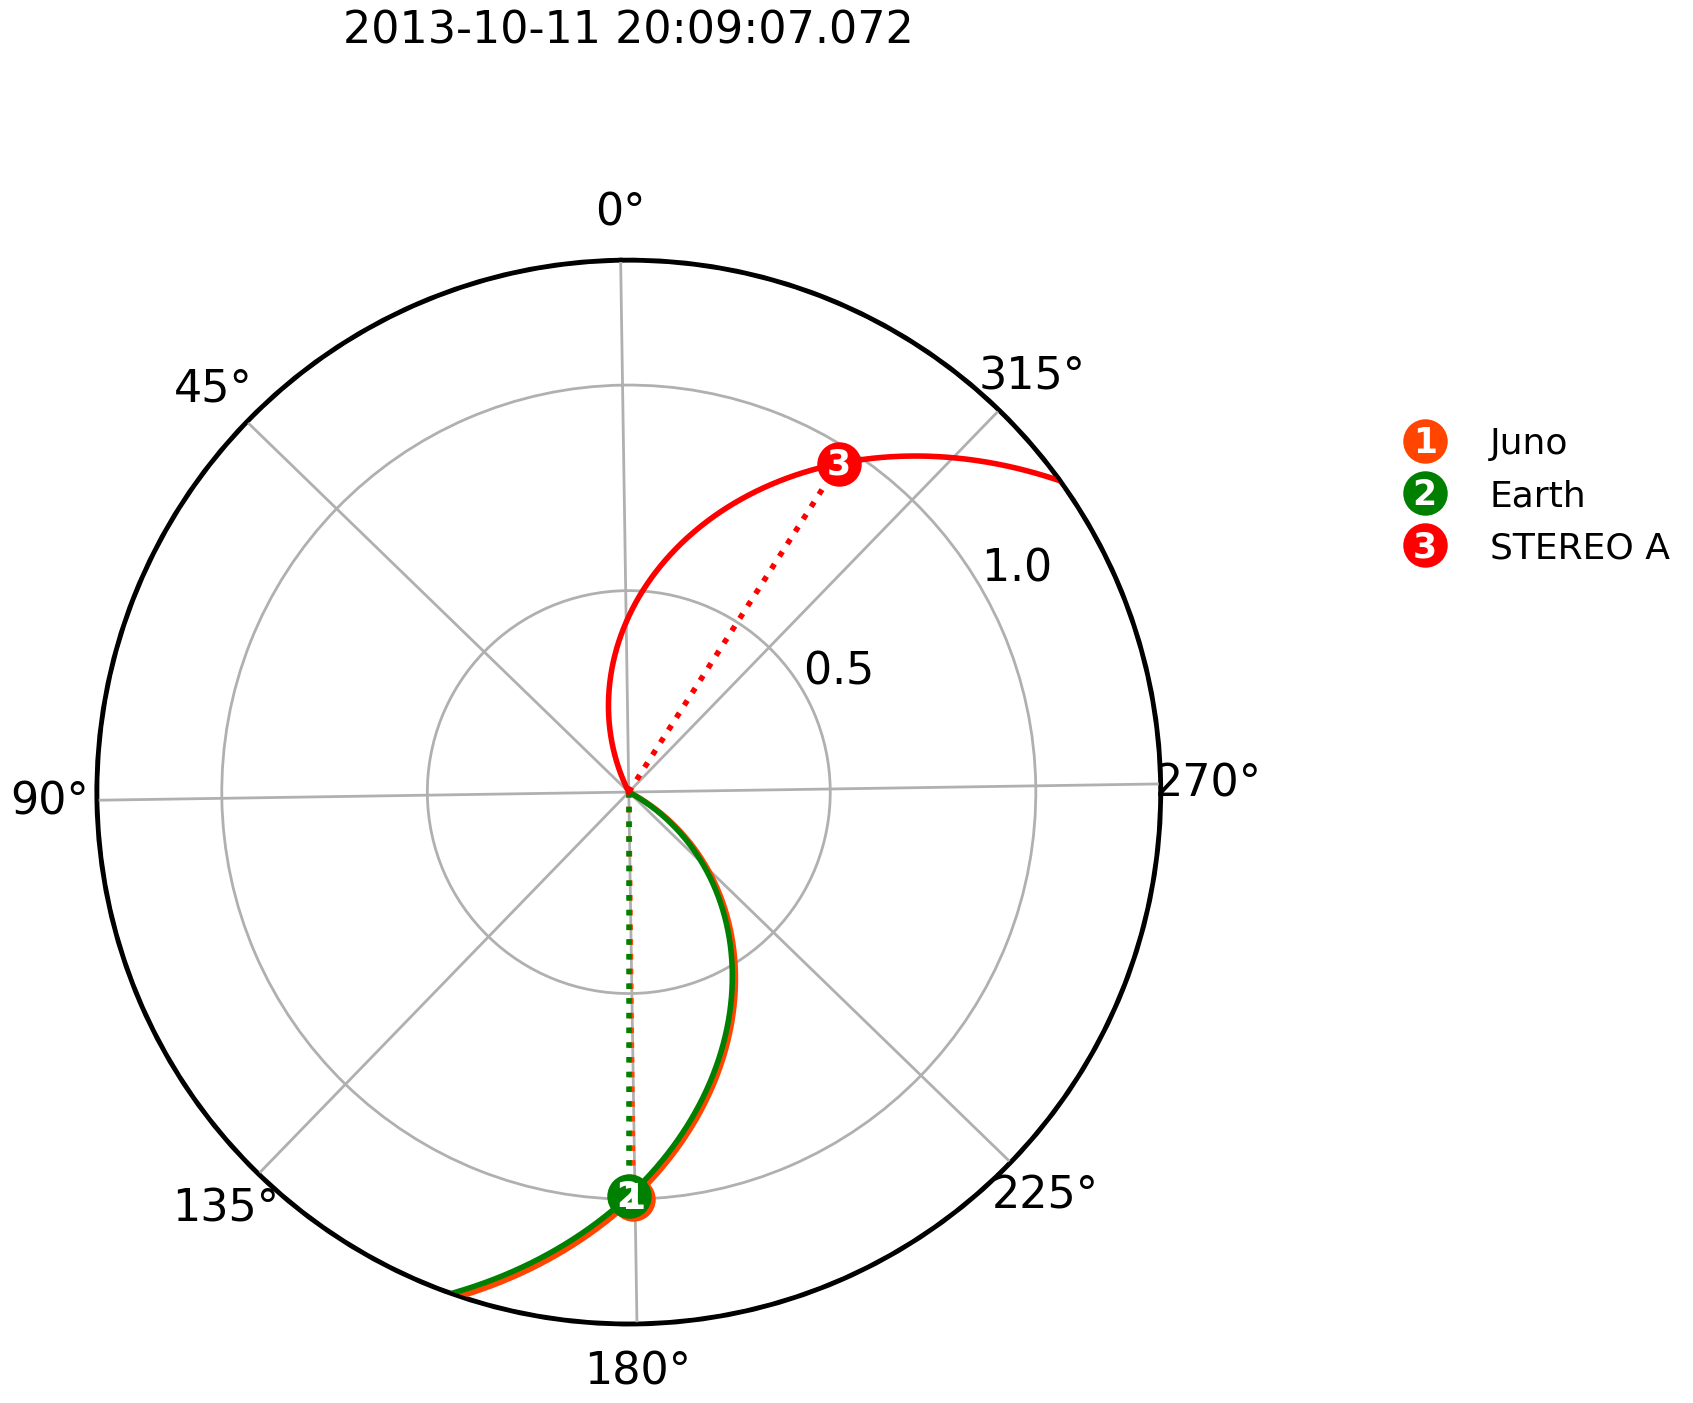

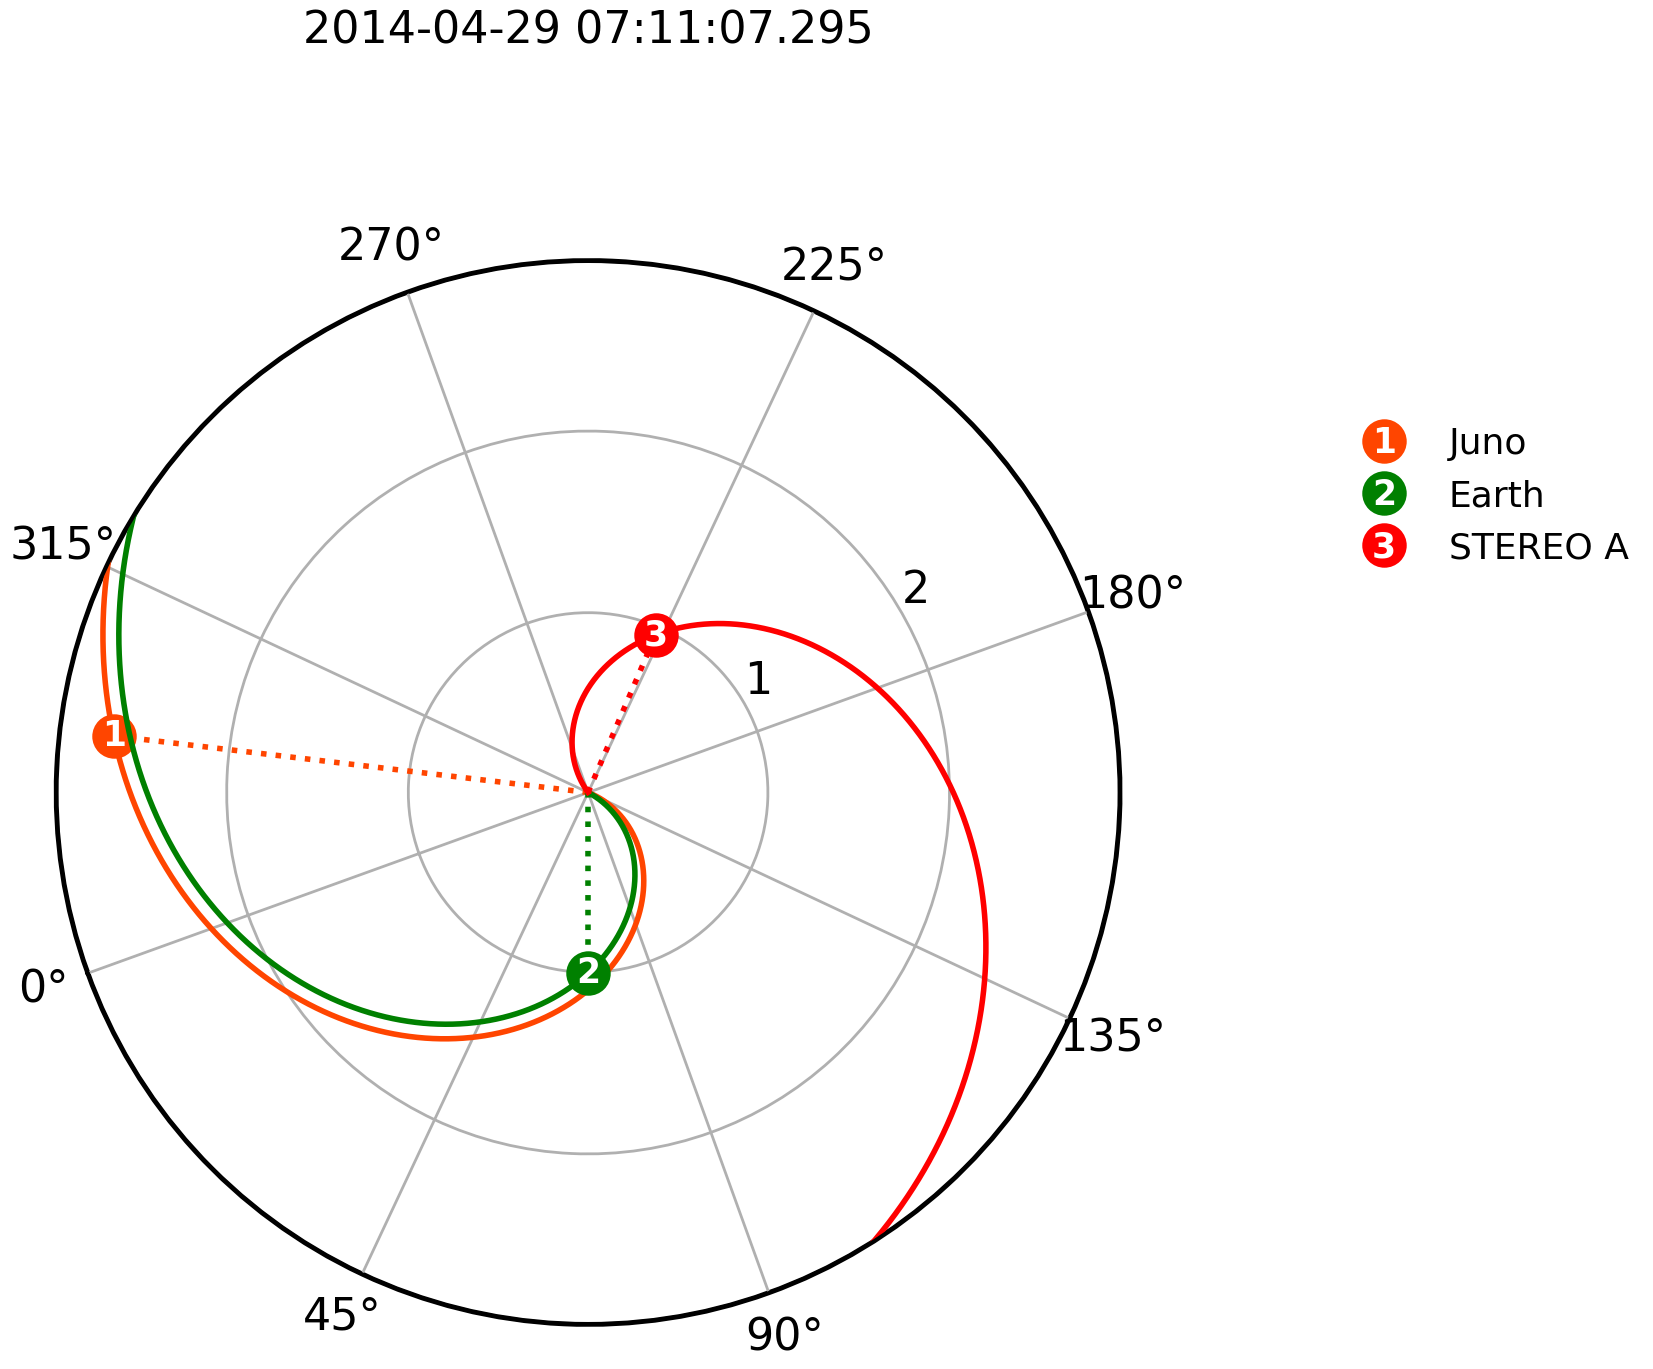

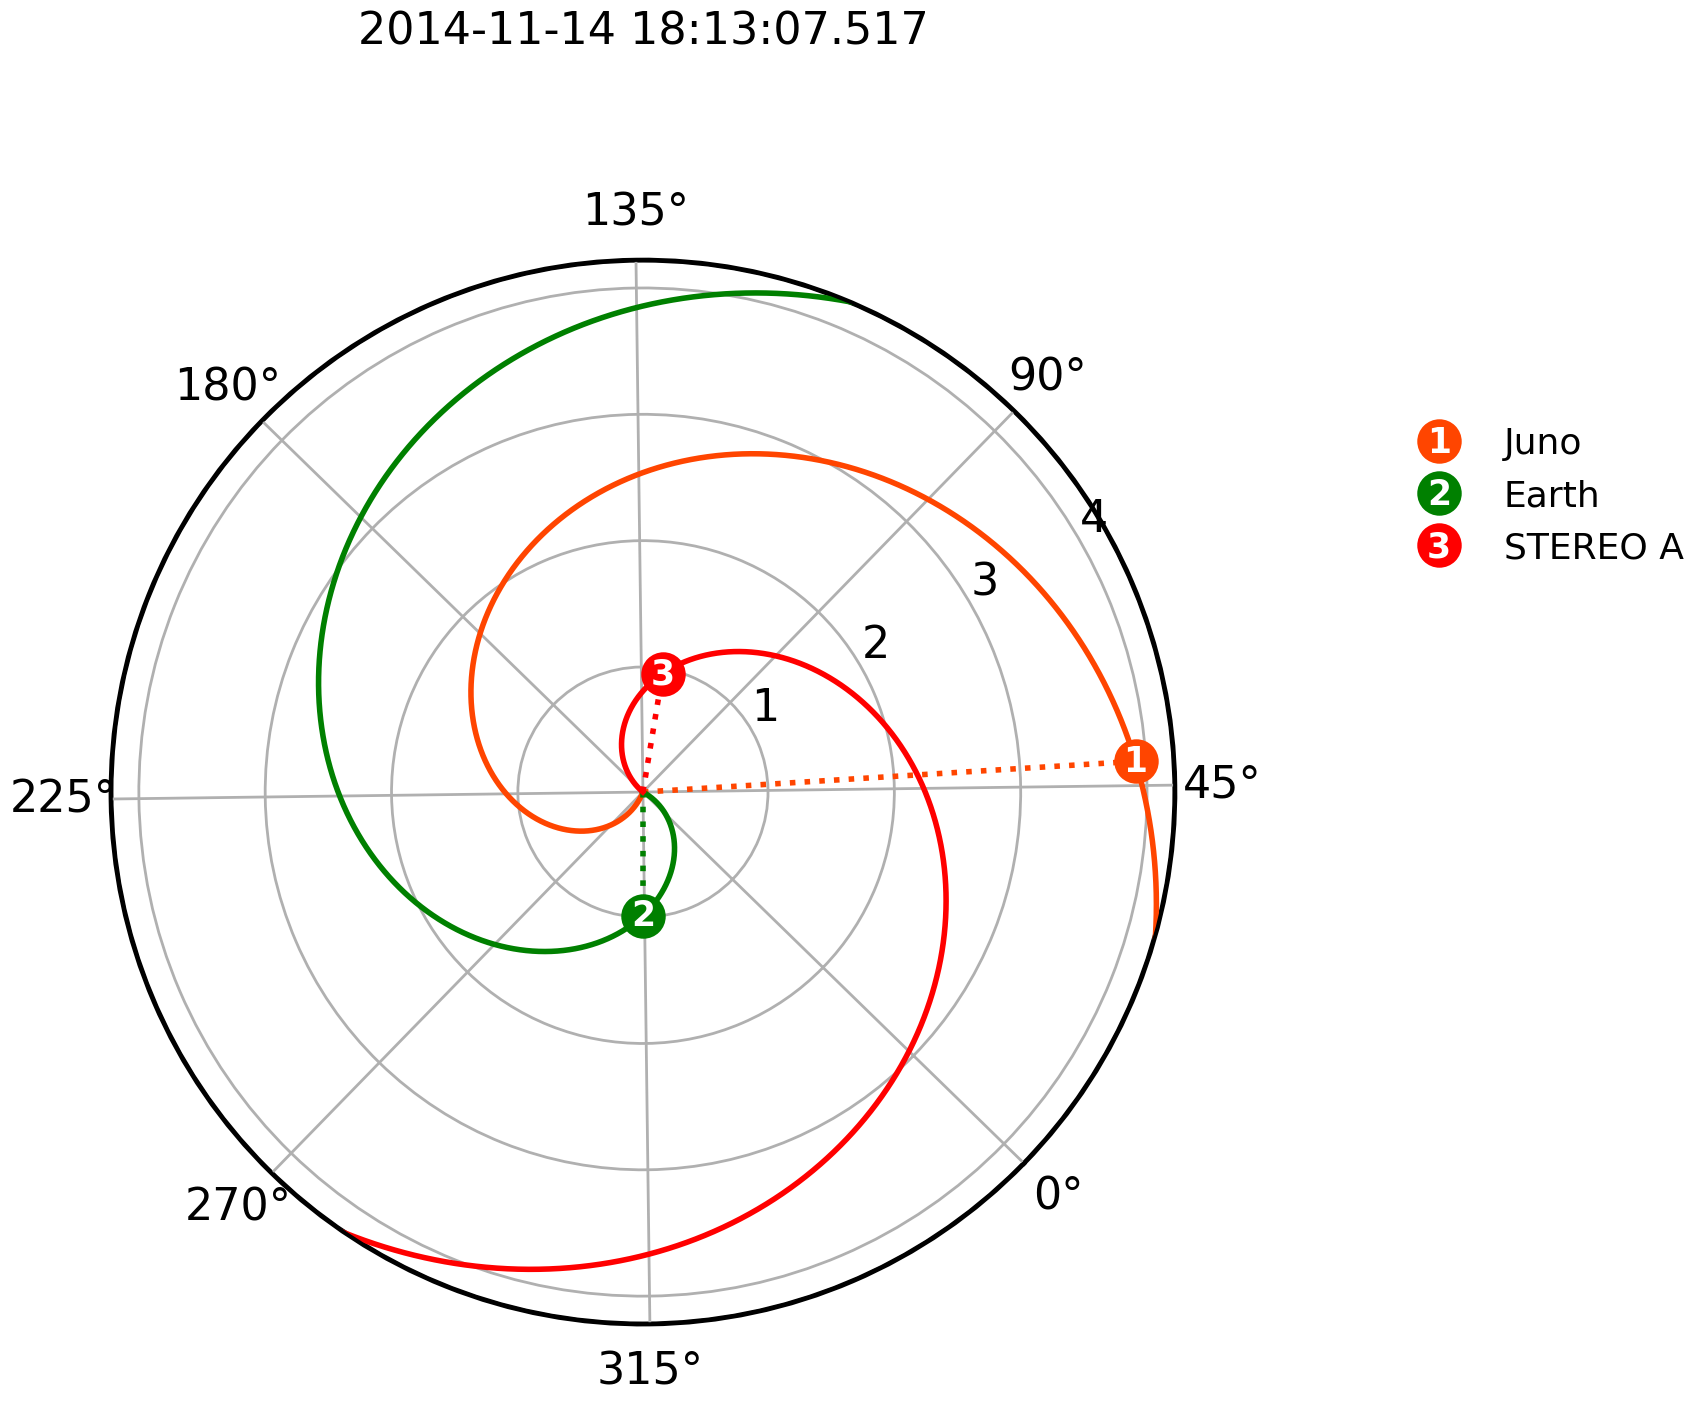

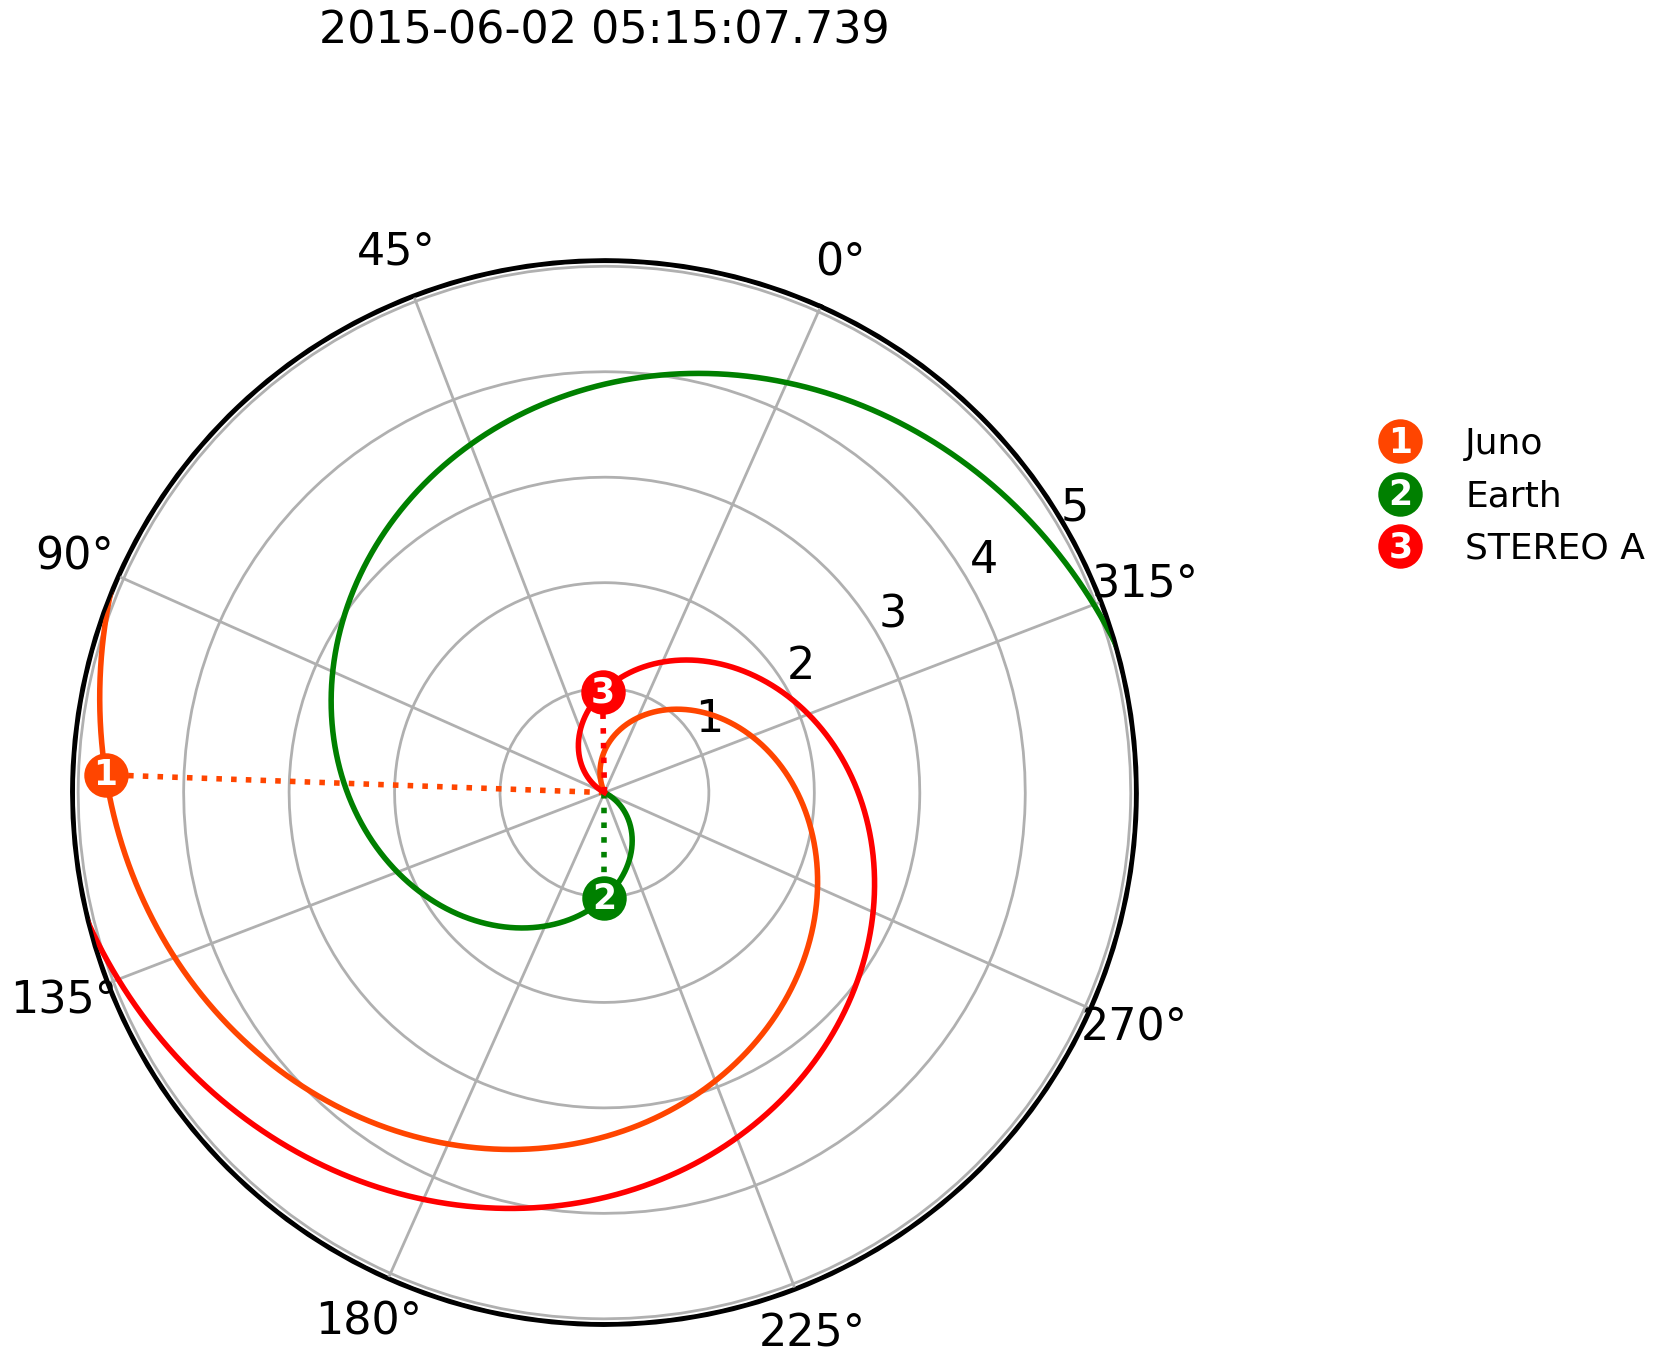

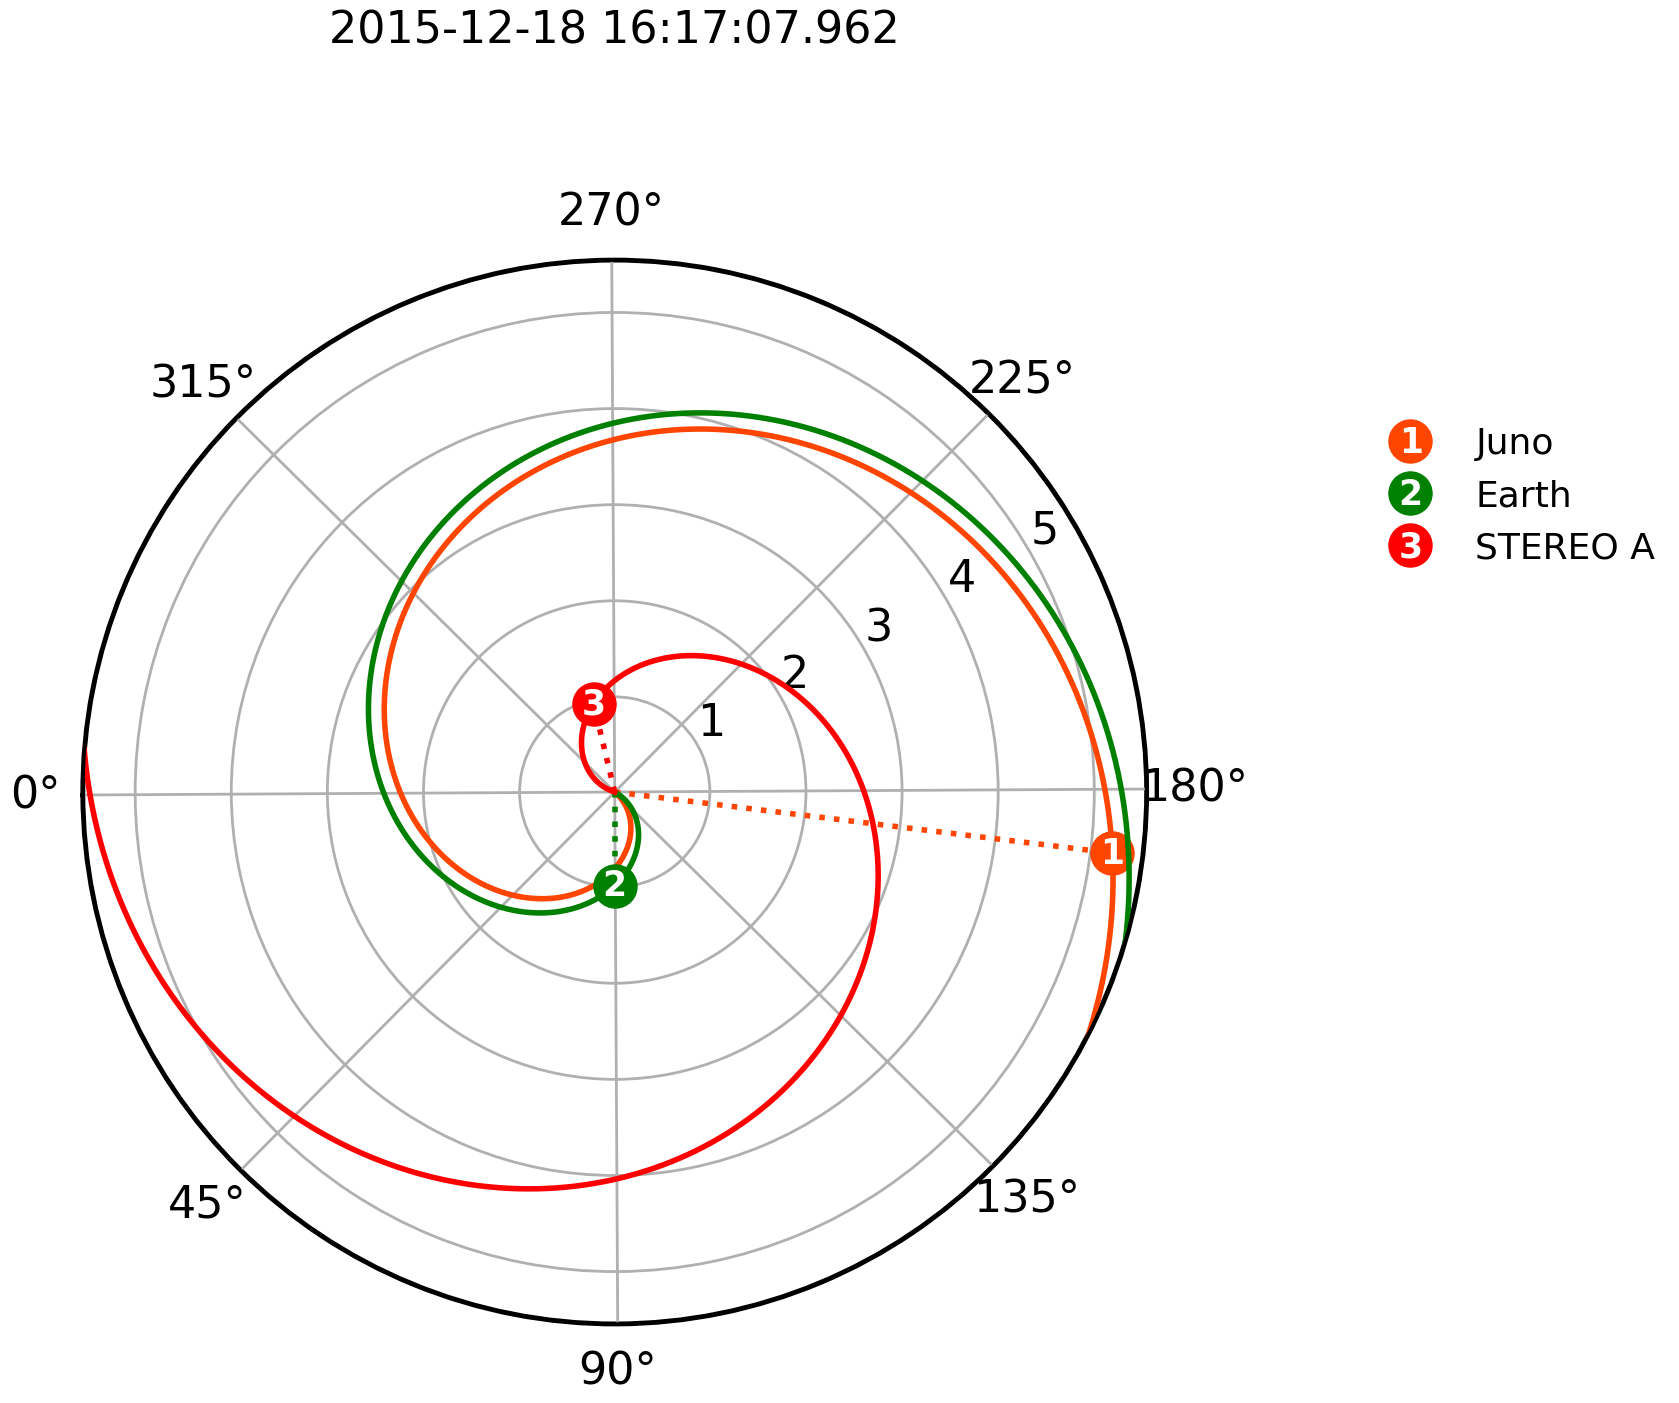

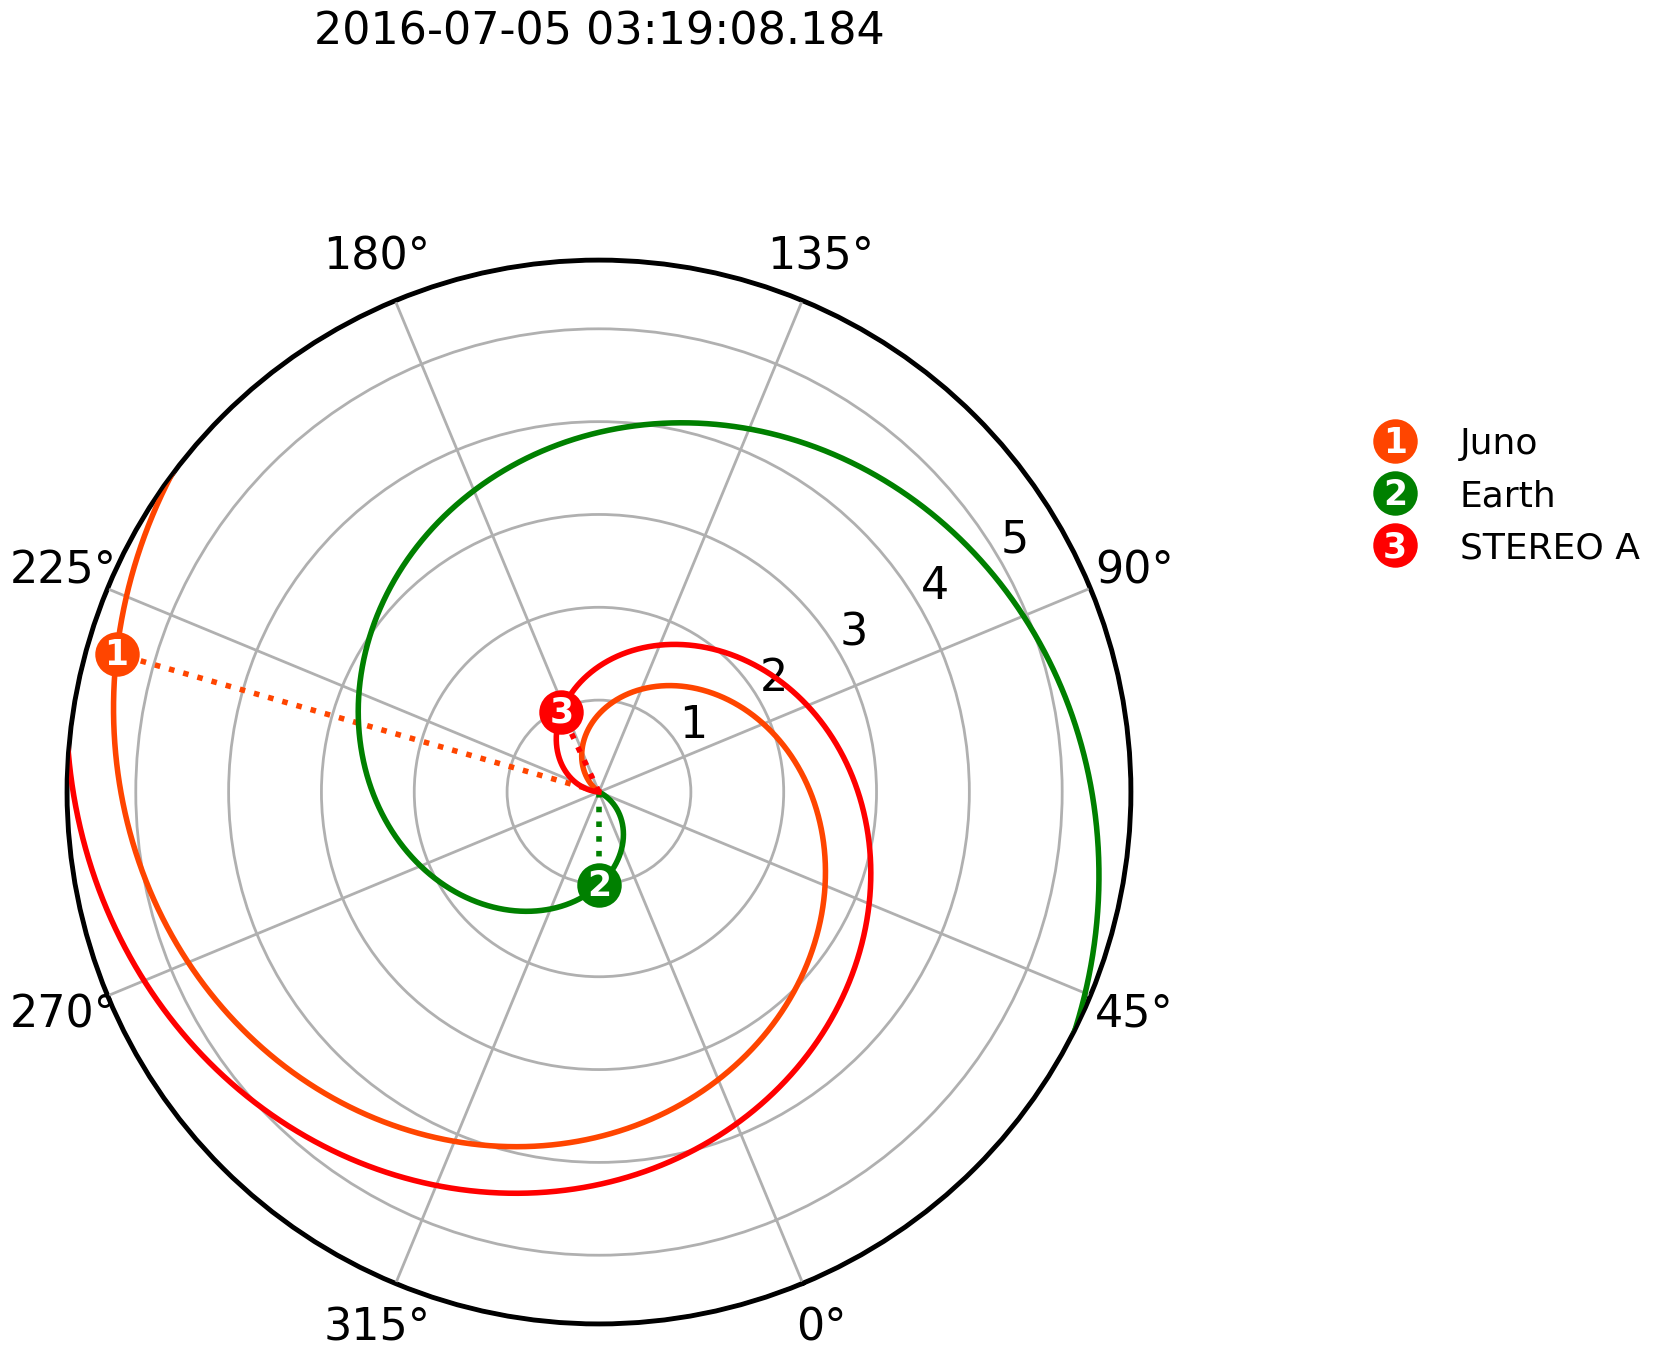


[
      Spacecraft/Body  Carrington longitude (°)  Carrington latitude (°)  \
0            Juno                270.206511                 6.101317   
1           Earth                270.146123                 6.098475   
2        STEREO-A                 10.976774                 2.696510   

   Heliocentric distance (AU)  Longitudinal separation to Earth's longitude  \
0                    1.014197                                      0.060389   
1                    1.014413                                      0.000000   
2                    0.963236                                   -259.169349   

   Latitudinal separation to Earth's latitude  Vsw  \
0                                    0.002841  400   
1                                    0.000000  400   
2                                   -3.401966  400   

   Magnetic footpoint longitude (Carrington)  
0                                 333.071205  
1                                 333.024704  
2                            

In [ ]:
from poliastro.util import time_range
from pipe import select

list(
    time_range(date_launch, end=date_arrival, periods=10)
    | select(lambda x: x.value)
    | select(plot_solarmach)
)

#### Trajectories

In [ ]:

from poliastro.bodies import Sun, Earth, Mars, Jupiter
from poliastro.ephem import Ephem
from poliastro.frames import Planes
from poliastro.plotting.util import generate_label
from poliastro.twobody import Orbit

In [ ]:
periods = 70

juno_ic1= Ephem.from_horizons(
    "Juno (spacecraft)",
    epochs=time_range(date_launch, end=date_flyby),
    plane=Planes.EARTH_ECLIPTIC,
)

juno_ic2= Ephem.from_horizons(
    "Juno (spacecraft)",
    epochs=time_range(date_flyby, end=date_arrival),
    plane=Planes.EARTH_ECLIPTIC,
)


stereo_a_ic1 = Ephem.from_horizons(
    "STEREO-A",
    epochs=time_range(date_launch, end=date_flyby),
    plane=Planes.EARTH_ECLIPTIC,
)

stereo_a_ic2 = Ephem.from_horizons(
    "STEREO-A",
    epochs=time_range(date_flyby, end=date_arrival),
    plane=Planes.EARTH_ECLIPTIC,
)

earth = Ephem.from_body(
    Earth, time_range(date_launch, end=date_arrival, periods=periods)
)

In [ ]:
from poliastro.plotting import StaticOrbitPlotter

In [ ]:
from fastcore.utils import patch


@patch
def plot_body(
    self: StaticOrbitPlotter, body, date, *, label=None, marker=None, **kawrgs
):
    _label = generate_label(date, label)
    traj, pos = self.plot_ephem(body, date, label=_label, **kawrgs)
    traj[0].set_linestyle("")  # No line
    pos.set_marker(marker) if marker else None

    return traj, pos


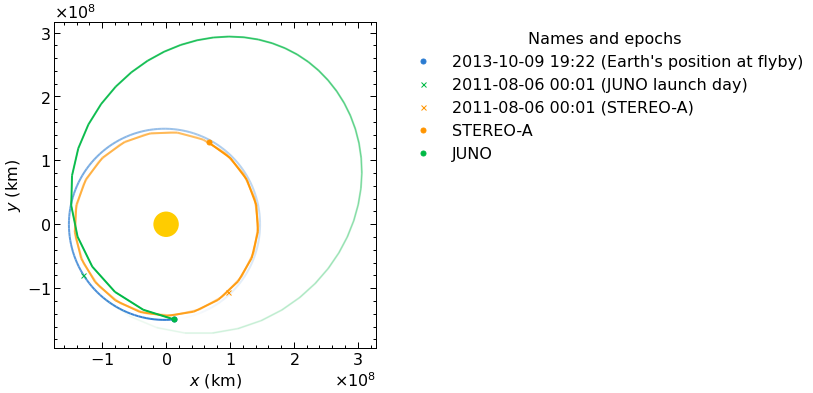

In [ ]:
plotter = StaticOrbitPlotter(plane=Planes.EARTH_ECLIPTIC)

plotter.plot_body_orbit(
    Earth, date_flyby, label="Earth's position at flyby", trail=True
)
plotter.plot_body(
    juno_ic1, date_launch, label="JUNO launch day", color="C1", trail=True, marker="x"
)
plotter.plot_body(stereo_a_ic1, date_launch, label="STEREO-A", color="C2", marker="x")
plotter.plot_ephem(stereo_a_ic1, date_flyby, label="STEREO-A", color="C2", trail=True)
plotter.plot_ephem(juno_ic1, date_flyby, label="JUNO", color="C1", trail=True)
savefig("juno_ic1_traj")

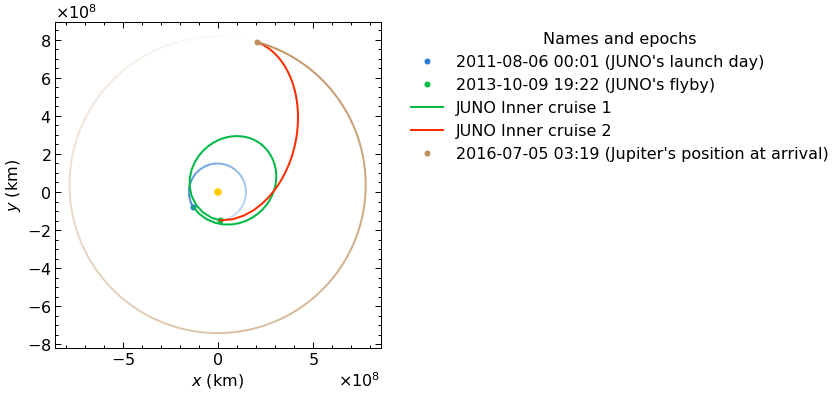

In [ ]:
plotter = StaticOrbitPlotter(plane=Planes.EARTH_ECLIPTIC)

plotter.plot_body_orbit(
    Earth, date_launch, label="JUNO's launch day", trail=True
)

plotter.plot_body(
    juno_ic1, date_flyby, label="JUNO's flyby", color="C1"
)

plotter.plot_trajectory(juno_ic1._coordinates, label="JUNO Inner cruise 1", color="C1")
plotter.plot_trajectory(juno_ic2._coordinates, label="JUNO Inner cruise 2", color="C3")


plotter.plot_body_orbit(
    Jupiter, date_arrival, label="Jupiter's position at arrival", trail=True
)
savefig("juno_traj")

In [ ]:
## Main dates
date_launch = Time("2011-08-06", scale="utc").tdb
date_flyby = Time("2013-10-09 19:21", scale="utc").tdb
date_arrival = Time("2016-07-05 03:18", scale="utc").tdb